In [2]:
pip install tensorflow numpy matplotlib

# **Data Preprocessing**

In [3]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Define paths to the directories
train_dir = '/content/train/train'  # Replace with the path to your training data
test_dir = '/content/test1/test1'    # Replace with the path to your test data

# Define image size to which we will resize the images for the model
image_size = (64, 64)  # Reduced image size to conserve memory

# Function to load and preprocess the images
def load_images(directory, image_size):
    labels = []  # List to store the labels
    data = []    # List to store the image data

    # Loop over each file in the directory
    for img_file in sorted(os.listdir(directory)):
        # Get the full path to the image file
        img_path = os.path.join(directory, img_file)
        # Load the image file, resizing it to `image_size`
        img = load_img(img_path, target_size=image_size)
        # Convert the image to a numpy array and normalize it
        img_array = img_to_array(img) / 255.0
        # Add the image data to the `data` list
        data.append(img_array)
        # Add the label to the `labels` list based on the file name
        label = 1 if 'dog' in img_file else 0
        labels.append(label)

    return np.array(data), np.array(labels)

# Load and preprocess the training data
train_data, train_labels = load_images(train_dir, image_size)

# Convert the labels to one-hot encoded format
train_labels = to_categorical(train_labels)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# Load the MobileNetV2 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = Sequential()
model.add(base_model)
model.add(Flatten())  # Flatten the output of the base model
model.add(Dense(128, activation='relu'))  # Reduced the number of units
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Create image data augmentation generators
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator()

# Prepare the data generators with a reduced batch size
train_generator = train_datagen.flow(X_train, y_train, batch_size=16)  # Reduced batch size
val_generator = val_datagen.flow(X_val, y_val, batch_size=16)  # Reduced batch size

# Train the model with the data generators
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,  # Reduced number of epochs
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Save the model
model.save('cats_vs_dogs_cnn_model.h5')

# Output the summary of the model
model.summary()


Epoch 1/20
1250/1250 [==============================] - 48s 32ms/step - loss: 0.5470 - accuracy: 0.7257 - val_loss: 0.4079 - val_accuracy: 0.8150
Epoch 2/20
1250/1250 [==============================] - 36s 29ms/step - loss: 0.4775 - accuracy: 0.7634 - val_loss: 0.4060 - val_accuracy: 0.8106
Epoch 3/20
1250/1250 [==============================] - 38s 31ms/step - loss: 0.4571 - accuracy: 0.7776 - val_loss: 0.3869 - val_accuracy: 0.8222
Epoch 4/20
1250/1250 [==============================] - 36s 29ms/step - loss: 0.4517 - accuracy: 0.7821 - val_loss: 0.3892 - val_accuracy: 0.8240
Epoch 5/20
1250/1250 [==============================] - 39s 31ms/step - loss: 0.4420 - accuracy: 0.7875 - val_loss: 0.4027 - val_accuracy: 0.8138
Epoch 6/20
1250/1250 [==============================] - 37s 30ms/step - loss: 0.4408 - accuracy: 0.7886 - val_loss: 0.3940 - val_accuracy: 0.8202
Epoch 7/20
1250/1250 [==============================] - 35s 28ms/step - loss: 0.4384 - accuracy: 0.7890 - val_loss: 0.3789 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 2, 2, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 5120)              0         
                                                                 
 dense (Dense)               (None, 128)               655488    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 2913730 (11.11 MB)
Trainable params: 655746 (2.50 MB)
Non-trainable params: 2257984 (8.61 MB)
______________

157/157 [==============================] - 2s 7ms/step
Training Loss: 0.34168052673339844
Training Accuracy: 0.8434500098228455
Validation Loss: 0.3805004358291626
Validation Accuracy: 0.8238000273704529

Training Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      9985
           1       0.82      0.88      0.85     10015

    accuracy                           0.84     20000
   macro avg       0.85      0.84      0.84     20000
weighted avg       0.85      0.84      0.84     20000


Validation Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.77      0.82      2515
           1       0.79      0.87      0.83      2485

    accuracy                           0.82      5000
   macro avg       0.83      0.82      0.82      5000
weighted avg       0.83      0.82      0.82      5000



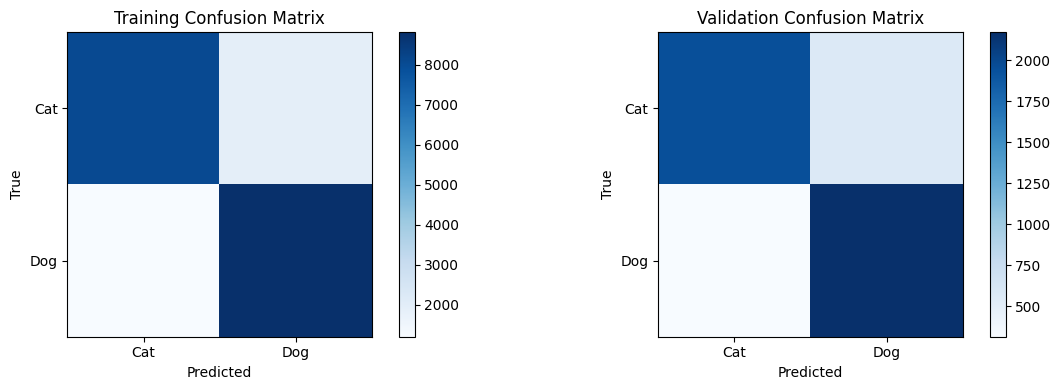

In [4]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

# Calculate predictions on both sets
train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)

# Convert predictions to binary (0 or 1)
train_pred_classes = np.argmax(train_predictions, axis=1)
val_pred_classes = np.argmax(val_predictions, axis=1)

# Calculate confusion matrices
train_cm = confusion_matrix(np.argmax(y_train, axis=1), train_pred_classes)
val_cm = confusion_matrix(np.argmax(y_val, axis=1), val_pred_classes)

# Calculate precision, recall, and F1-score
train_report = classification_report(np.argmax(y_train, axis=1), train_pred_classes)
val_report = classification_report(np.argmax(y_val, axis=1), val_pred_classes)

# Print and display metrics
print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

print("\nTraining Classification Report:\n", train_report)
print("\nValidation Classification Report:\n", val_report)

# Plot confusion matrices
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Training Confusion Matrix")
plt.imshow(train_cm, cmap="Blues", interpolation="nearest")
plt.colorbar()
plt.xticks([0, 1], labels=["Cat", "Dog"])
plt.yticks([0, 1], labels=["Cat", "Dog"])
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1, 2, 2)
plt.title("Validation Confusion Matrix")
plt.imshow(val_cm, cmap="Blues", interpolation="nearest")
plt.colorbar()
plt.xticks([0, 1], labels=["Cat", "Dog"])
plt.yticks([0, 1], labels=["Cat", "Dog"])
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.show()


In [5]:
!pip install scikit-learn
!pip install tensorflow


In [8]:
import pandas as pd

# Load and preprocess the test data (similar to how you loaded and preprocessed the training data)
def load_test_images(directory, image_size):
    data = []  # List to store the image data

    # Loop over each file in the directory
    for img_file in sorted(os.listdir(directory)):
        # Get the full path to the image file
        img_path = os.path.join(directory, img_file)
        # Load the image file, resizing it to `image_size`
        img = load_img(img_path, target_size=image_size)
        # Convert the image to a numpy array and normalize it
        img_array = img_to_array(img) / 255.0
        # Add the image data to the `data` list
        data.append(img_array)

    return np.array(data)

# Define the path to the test data directory
test_dir = '/content/test1/test1'  # Replace with the path to your test data

# Load and preprocess the test data
test_data = load_test_images(test_dir, image_size)

# Make predictions on the test data using the trained model
predictions = model.predict(test_data)

# Assuming you want to format the predictions for submission (Kaggle competition)
# You may need to adjust this part based on the specific competition requirements
# For example, you might need to create a CSV file with image IDs and corresponding predictions
# Here's a simplified example:

# Assuming you have a list of image IDs for the test data (replace with your actual image IDs)
test_image_ids = [f'image_{i}.jpg' for i in range(1, len(test_data) + 1)]

# Format the predictions as required for submission
submission = pd.DataFrame({'id': test_image_ids, 'label': predictions.argmax(axis=1)})

# Save the submission to a CSV file (adjust the file name as needed)
submission.to_csv('submission.csv', index=False)


391/391 [==============================] - 2s 6ms/step
